In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline
RANDOM_SEED = 27
LABELS = ["Normal", "Fraud"]

In [5]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Time is irrelevant
df2 = df.drop(['Time'], axis=1)
# Standardize Amount
#df2['Amount'] = StandardScaler().fit_transform(df2['Amount'].values.reshape(-1, 1))
# split data
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=RANDOM_SEED)
# Train on Normal (Class=0)
X_train = X_train[X_train.Class == 0]
# "Class" variable is not needed
X_train = X_train.drop(['Class'], axis=1)
# test data
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

# Standardize data based on mean & sd of X_train
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# convert to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()



In [7]:
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))
print(np.mean(X_test,axis=0))
print(np.std(X_test,axis=0))

[-1.60878544e-17  6.59133450e-18 -4.43587441e-18 -2.51470345e-18
 -2.24917576e-18 -6.18523333e-18 -6.71628871e-18 -5.46674663e-19
  1.46508810e-17 -1.52131749e-17  2.46159791e-17 -6.31018754e-18
 -7.65344528e-18 -9.68395117e-18 -1.84619843e-17  1.12458788e-18
  2.30852900e-17  1.05586306e-17 -7.99706935e-18  1.32763847e-18
  3.56119495e-18 -3.69864458e-17 -1.62440471e-18 -3.43936459e-17
  1.62440471e-17 -1.19643655e-17  1.24954209e-18 -2.24917576e-18
  4.37339730e-17]
[0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978 0.9999978
 0.9999978]
[-9.64158338e-03  6.78752177e-03 -3.24662393e-03 -3.59966298e-03
  2.35552828e-03 -1.54444756e-03 -8.79391841e-03 -9.22211456e-04
 -7.35124705e-03 -1.33556197e-02  1.48988153e-02  9.97076818e-04
  3.49648368e-03 -9.50247775e-03  6.

In [9]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [10]:

# defining the key parameters
batch_size = 100
original_dim = 29
latent_dim = 5
intermediate_dim1 = 20
intermediate_dim2 = 10
epochs = 50
epsilon_std = 1.0

In [11]:
#########################
# input to our encoder
#########################
x = Input(shape=(original_dim,), name="input")
# intermediate layer
h1 = Dense(intermediate_dim1, activation="tanh", name="encoding1", activity_regularizer=regularizers.l1(10e-5))(x)
h = Dense(intermediate_dim2, activation='relu', name="encoding")(h1)
# defining the mean of the latent space
z = Dense(latent_dim, activation='relu', name="encoder_out")(h)
# defining the encoder as a keras model
encoder = Model(x, z, name="encoder")
# print out summary of what we just did
encoder.summary()
     

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 29)]              0         
                                                                 
 encoding1 (Dense)           (None, 20)                600       
                                                                 
 encoding (Dense)            (None, 10)                210       
                                                                 
 encoder_out (Dense)         (None, 5)                 55        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#########################
# Input to the decoder
#########################
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
decoder_h1 = Dense(intermediate_dim2, activation='relu', name="decoder_h1")(input_decoder)
decoder_h = Dense(intermediate_dim1, activation='relu', name="decoder_h")(decoder_h1)
# getting the mean from the original dimension
x_decoded = Dense(original_dim, activation='tanh', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder = Model(input_decoder, x_decoded, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 5)]               0         
                                                                 
 decoder_h1 (Dense)          (None, 10)                60        
                                                                 
 decoder_h (Dense)           (None, 20)                220       
                                                                 
 flat_decoded (Dense)        (None, 29)                609       
                                                                 
Total params: 889 (3.47 KB)
Trainable params: 889 (3.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
##########################
# Autoencoder
##########################
# grab the output. Recall, that we need to grab the 3rd element our sampling z
output_combined = decoder(encoder(x))
# link the input and the overall output
autoencoder = Model(x, output_combined)
# print out what the overall model looks like
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 29)]              0         
                                                                 
 encoder (Functional)        (None, 5)                 865       
                                                                 
 decoder (Functional)        (None, 29)                889       
                                                                 
Total params: 1754 (6.85 KB)
Trainable params: 1754 (6.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
########################
# training Autoencoder
########################
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history

Epoch 1/50
2275/2275 [==============================] - 5s 1ms/step - loss: 0.7936 - accuracy: 0.1537 - val_loss: 0.7743 - val_accuracy: 0.1672
Epoch 2/50
2275/2275 [==============================] - 3s 1ms/step - loss: 0.7151 - accuracy: 0.1794 - val_loss: 0.7461 - val_accuracy: 0.1960
Epoch 3/50
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6942 - accuracy: 0.2055 - val_loss: 0.7313 - val_accuracy: 0.2165
Epoch 4/50
2275/2275 [==============================] - 3s 1ms/step - loss: 0.6813 - accuracy: 0.2177 - val_loss: 0.7191 - val_accuracy: 0.2221
Epoch 5/50
2275/2275 [==============================] - 6s 3ms/step - loss: 0.6674 - accuracy: 0.2231 - val_loss: 0.7049 - val_accuracy: 0.2218
Epoch 6/50
2275/2275 [==============================] - 7s 3ms/step - loss: 0.6549 - accuracy: 0.2374 - val_loss: 0.6933 - val_accuracy: 0.2516
Epoch 7/50
2275/2275 [==============================] - 7s 3ms/step - loss: 0.6442 - accuracy: 0.2742 - val_loss: 0.6853 - val_accuracy:

In [15]:
    ##########################################
# prediction & reconstruction error
##########################################
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
print("Full Sample",error_df.describe())
error_df_true = error_df[(error_df['true_class']== 0)]
print("Normal Sample",error_df_true.describe())
error_df_false = error_df[(error_df['true_class']== 1)]
print("Fraud Sample",error_df_false.describe())
     

1781/1781 [==============================] - 3s 1ms/step
Full Sample        reconstruction_error    true_class
count          56962.000000  56962.000000
mean               0.621618      0.001826
std                3.879569      0.042690
min                0.009571      0.000000
25%                0.149599      0.000000
50%                0.255391      0.000000
75%                0.459529      0.000000
max              445.603501      1.000000
Normal Sample        reconstruction_error  true_class
count          56858.000000     56858.0
mean               0.578855         0.0
std                3.525307         0.0
min                0.009571         0.0
25%                0.149463         0.0
50%                0.254896         0.0
75%                0.457671         0.0
max              445.603501         0.0
Fraud Sample        reconstruction_error  true_class
count            104.000000       104.0
mean              24.000545         1.0
std               30.172420         0.0
min   

In [16]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

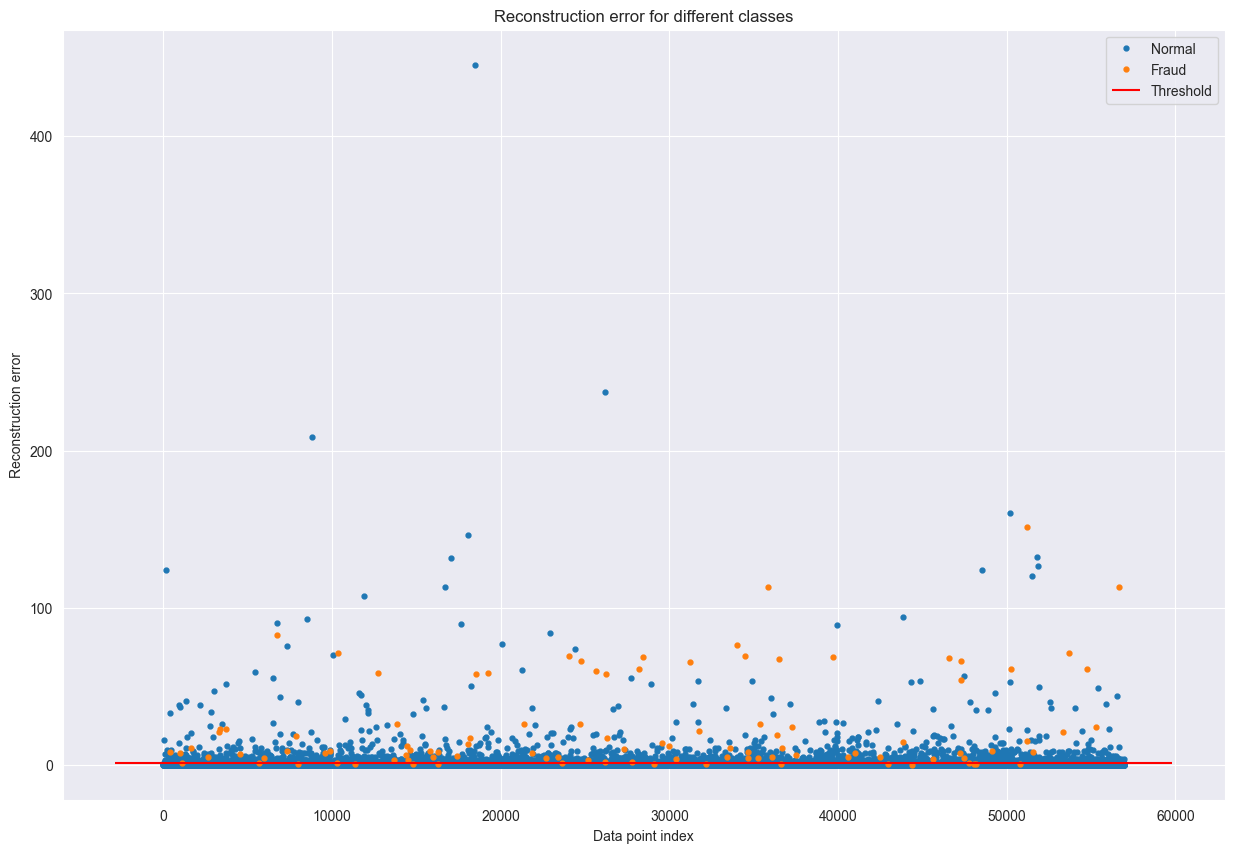

In [17]:

# scatter plot
threshold = 0.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

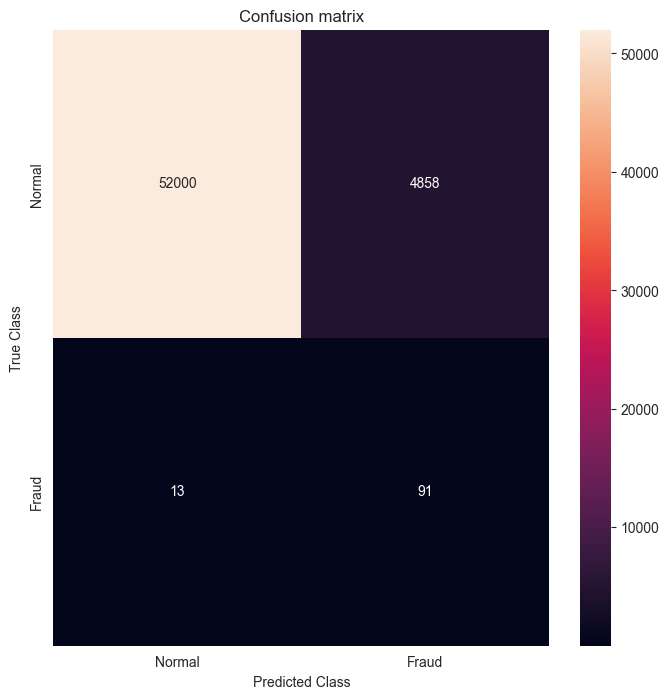

In [18]:
# confusion matrix
threshold = 0.9
# And see how well we're dividing the two types of transactions:
groups = error_df.groupby('true_class')
# predict fraud
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

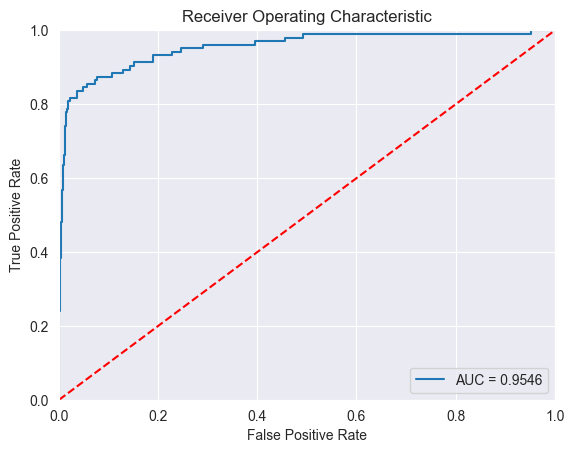

In [19]:
# ROC
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
# plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();